# SCC0630 - Inteligência Artificial
## Trabalho Prático 2 - Mineração de Dados

### Tema: Acidentes de trânsito no Reino Unido

#### Alunos
* Alexandre Batistella Bellas&emsp;&emsp;&emsp;&emsp;9763168
* Guilherme dos Reis Meneguello&emsp;&ensp;9313707
* Guilherme Lima Blatt&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;9771470
* Igor Guedes Rodrigues&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;9771654
* Murilo Luz Stucki&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;9360902
* Thiago Músico&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;9771567
* Tiago Lemes Daneluzzi&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;8531320

## Escolha da base de dados

<div style="text-align: justify">
Para este trabalho prático, foram pesquisadas diversas bases de dados dentro do site Kaggle, a principal comunidade de cientistas de dados do mundo. Diante dos mais variados temas, escolhemos a base de dados <i>1.6 million UK traffic accidents</i>, disponível para download <a href="https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales">neste link</a>. Sobre a base de dados, a descrição, seus atributos e conhecimentos retirados serão detalhados posteriormente e no relatório anexado a esse <i>notebook</i>.
</div>

## Proposta de trabalho e detalhamento da mineração

<div style="text-align: justify">
    Para a mineração de dados, devemos, primeiramente, aplicar o pré-processamento na base de dados. Para isso, leremos a base de dados, removeremos todos os dados faltantes (NaN, "?", vazios, ...), separaremos os nomes dos atributos em uma lista para posterior consulta, investigaremos os dados únicos de possíveis atributos-classe e outras características interessantes como quantidade de linhas, intervalo de valores, entre outros.<br><br>
    Posteriormente, aplicaremos uma análise de agrupamento na base de dados, verificando os dados mais próximos entre si, podendo perceber um padrão nas causas dos acidentes registrados, ou mesmo algum tipo de análise profunda dos principais porquês da ocorrência dos acidentes e suas consequências. Utilizando algoritmos de agrupamento como o <i>K-Means</i> e o <i>Linkage</i>, alcançaremos uma análise primária das tendências sobre os incidentes.<br><br>
    Em seguida, com algoritmos de regras de associação como o <i>Apriori</i>, podemos ver pontualmente como os valores de determinados atributos se associam, e se há uma regra de acontecimento de um acidente a partir de dada situação. Assim, se torna um complemento do estudo prévio feito.<br><br>
    Por fim, podemos treinar nossa base de dados com modelos preditivos, como <i>K-Nearest Neighbors</i>, <i>Decision Tree</i>, <i>Naive Bayes</i>, entre outros, para que se possa adquirir uma forma de predizer se uma dada situação resultará em um acidente de alta gravidade. Dessa forma, pensando como polícia local, pode-se priorizar solucionar as situações que apresentam maior risco à população, além de conseguir mensurar o quão perigoso seria, para o suposto motorista, estar na situação imaginada.
</div>

## Aplicação da mineração de dados e análise dos resultados obtidos

### Pré-processamento dos dados

#### Tratamento dos dados

In [18]:
#Bibliotecas necessárias para o pré-processamento
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Configurando a biblioteca Pandas => mostrar todas as colunas quando printar o DataFrame
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [20]:
#Lendo os dados do dataset
df_bruto = pd.read_csv("data/accidents_2012_to_2014.csv", low_memory=False)
df_bruto.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,5,20:35,12,E09000020,3,308,Single carriageway,30,NaN,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,4,17:00,1,E09000033,4,412,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,3,10:07,12,E09000020,3,3220,One way street,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,4,12:20,12,E09000020,5,0,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,3,20:24,12,E09000020,4,325,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012
5,201201BS70006,526090,177600,-0.185496,51.483253,1,3,2,1,19/01/2012,5,07:30,12,E09000020,3,308,Single carriageway,30,NaN,Automatic traffic signal,3,3220,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002912,2012
6,201201BS70007,527780,179680,-0.160418,51.501567,1,3,1,1,12/01/2012,5,14:00,1,E09000033,3,3216,Single carriageway,30,NaN,Automatic traffic signal,3,4,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002818,2012
7,201201BS70008,524010,182080,-0.213862,51.523975,1,3,2,1,07/01/2012,7,11:29,12,E09000020,4,450,Roundabout,30,NaN,Giveway or uncontrolled,5,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002905,2012
8,201201BS70010,527710,179290,-0.161567,51.498077,1,3,2,1,07/01/2012,7,13:55,12,E09000020,6,0,One way street,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01002818,2012
9,201201BS70011,525120,180060,-0.198587,51.505576,1,3,2,1,04/01/2012,4,19:40,12,E09000020,5,0,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002825,2012


In [21]:
#Atributos presentes no dataset
print("Atributos do dataset:")
for i in df_bruto.columns:
    print("\t" + i)

Atributos do dataset:
	Accident_Index
	Location_Easting_OSGR
	Location_Northing_OSGR
	Longitude
	Latitude
	Police_Force
	Accident_Severity
	Number_of_Vehicles
	Number_of_Casualties
	Date
	Day_of_Week
	Time
	Local_Authority_(District)
	Local_Authority_(Highway)
	1st_Road_Class
	1st_Road_Number
	Road_Type
	Speed_limit
	Junction_Detail
	Junction_Control
	2nd_Road_Class
	2nd_Road_Number
	Pedestrian_Crossing-Human_Control
	Pedestrian_Crossing-Physical_Facilities
	Light_Conditions
	Weather_Conditions
	Road_Surface_Conditions
	Special_Conditions_at_Site
	Carriageway_Hazards
	Urban_or_Rural_Area
	Did_Police_Officer_Attend_Scene_of_Accident
	LSOA_of_Accident_Location
	Year


<div style="text-align: justify">
    Por conta de poucas informações nos atributos <i>Junction_Detail</i>, <i>Special_Conditions_at_Site</i>, <i>Carriageway_Hazards</i> e <i>LSOA_of_Accident_Location</i>, iremos removê-los do <i>dataset</i>. Além disso, não precisaremos das informações <i>Accident_Index</i>, <i>Location_Easting_OSGR</i>, <i>Location_Northing_OSGR</i>, <i>1st_Road_Class</i>, <i>1st_Road_Number</i>, <i>2nd_Road_Class</i> e <i>2nd_Road_Number</i> de cada valor.
    </div>

In [22]:
df = df_bruto.drop(columns=[
    'Accident_Index',
    'Special_Conditions_at_Site',
    'Carriageway_Hazards',
    'Junction_Detail',
    'LSOA_of_Accident_Location',
    'Location_Easting_OSGR',
    'Location_Northing_OSGR',
    '1st_Road_Class',
    '1st_Road_Number',
    '2nd_Road_Class',
    '2nd_Road_Number'
])

In [23]:
#Retirando todas as linhas que possuem dados duplicados
a, counts = np.unique(df.duplicated(), return_counts=True)
print("Número de linhas duplicadas:", (counts[1]))

# Mantendo apenas linhas únicas
df = df.drop_duplicates()

print("Número de linhas únicas:", len(df))

Número de linhas duplicadas: 34149
Número de linhas únicas: 430548


In [25]:
#Removendo todas as linhas que possuem valores NaN e Unknown
df = df.replace('Unknown', np.nan)
df = df.dropna()
print("Número de linhas completas:", len(df))

Número de linhas completas: 257535


Após todas as modificações, temos nosso *dataset* quase-bruto pronto para utilizar nos métodos de análise.

In [8]:
#Apresentação do dataset
df.head(10)

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.169101,51.493429,1,3,2,1,19/01/2012,5,20:35,12,E09000020,Single carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
1,-0.200838,51.517931,1,3,2,1,04/01/2012,4,17:00,1,E09000033,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
2,-0.188636,51.487618,1,3,2,1,10/01/2012,3,10:07,12,E09000020,One way street,30,Giveway or uncontrolled,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
3,-0.200259,51.514325,1,3,1,1,18/01/2012,4,12:20,12,E09000020,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
4,-0.183773,51.497614,1,3,1,1,17/01/2012,3,20:24,12,E09000020,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
5,-0.185496,51.483253,1,3,2,1,19/01/2012,5,07:30,12,E09000020,Single carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,1,Yes,2012
6,-0.160418,51.501567,1,3,1,1,12/01/2012,5,14:00,1,E09000033,Single carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
7,-0.213862,51.523975,1,3,2,1,07/01/2012,7,11:29,12,E09000020,Roundabout,30,Giveway or uncontrolled,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
8,-0.161567,51.498077,1,3,2,1,07/01/2012,7,13:55,12,E09000020,One way street,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,No,2012
9,-0.198587,51.505576,1,3,2,1,04/01/2012,4,19:40,12,E09000020,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,1,Yes,2012


#### Características do *dataset*

In [9]:
#Atributos no dataset atual
print("Atributos do dataset atual:")
for i in df.columns:
    print("\t" + i)

Atributos do dataset atual:
	Longitude
	Latitude
	Police_Force
	Accident_Severity
	Number_of_Vehicles
	Number_of_Casualties
	Date
	Day_of_Week
	Time
	Local_Authority_(District)
	Local_Authority_(Highway)
	Road_Type
	Speed_limit
	Junction_Control
	Pedestrian_Crossing-Human_Control
	Pedestrian_Crossing-Physical_Facilities
	Light_Conditions
	Weather_Conditions
	Road_Surface_Conditions
	Urban_or_Rural_Area
	Did_Police_Officer_Attend_Scene_of_Accident
	Year


In [10]:
def contarFrequenciaDeAtributo(classes):
    cl = np.unique(classes)
    ncl = np.zeros(len(cl))
    for i in np.arange(0, len(cl)):
        a = classes == cl[i]
        ncl[i] = len(classes[a])

    for i, j in zip(cl, ncl):
        print("\t" + str(i) + ": " + str(int(j)))

In [11]:
#Obtendo os valores únicos de alguns atributos não-binários e sua frequência
print("====== Valores únicos de atributos relevantes e suas frequências ======")
print("Accident_Severity:")
contarFrequenciaDeAtributo(df['Accident_Severity'])

print("\nRoad_Type:")
contarFrequenciaDeAtributo(df['Road_Type'])

print("\nSpeed_limit:")
contarFrequenciaDeAtributo(df['Speed_limit'])

print("\nJunction_Control:")
contarFrequenciaDeAtributo(df['Junction_Control'])

print("\nPedestrian_Crossing-Human_Control:")
contarFrequenciaDeAtributo(df['Pedestrian_Crossing-Human_Control'])

print("\nPedestrian_Crossing-Physical_Facilities:")
contarFrequenciaDeAtributo(df['Pedestrian_Crossing-Physical_Facilities'])

print("\nLight_Conditions:")
contarFrequenciaDeAtributo(df['Light_Conditions'])

print("\nWeather_Conditions:")
contarFrequenciaDeAtributo(df['Weather_Conditions'])

print("\nRoad_Surface_Conditions:")
contarFrequenciaDeAtributo(df['Road_Surface_Conditions'])

====== Valores únicos de atributos relevantes e suas frequências ======
Accident_Severity:
	1: 1814
	2: 33530
	3: 227150

Road_Type:
	Dual carriageway: 26360
	One way street: 5306
	Roundabout: 29680
	Single carriageway: 197214
	Slip road: 3202
	Unknown: 732

Speed_limit:
	20: 5158
	30: 196966
	40: 22219
	50: 7897
	60: 22788
	70: 7466

Junction_Control:
	Authorised person: 620
	Automatic traffic signal: 45411
	Giveway or uncontrolled: 214341
	Stop Sign: 2122

Pedestrian_Crossing-Human_Control:
	Control by other authorised person: 1054
	Control by school crossing patrol: 648
	None within 50 metres: 260792

Pedestrian_Crossing-Physical_Facilities:
	Central refuge: 7701
	Footbridge or subway: 1084
	No physical crossing within 50 meters: 196470
	Pedestrian phase at traffic signal junction: 29617
	Zebra crossing: 9792
	non-junction pedestrian crossing: 17830

Light_Conditions:
	Darkeness: No street lighting: 5008
	Darkness: Street lighting unknown: 3791
	Darkness: Street lights present and l

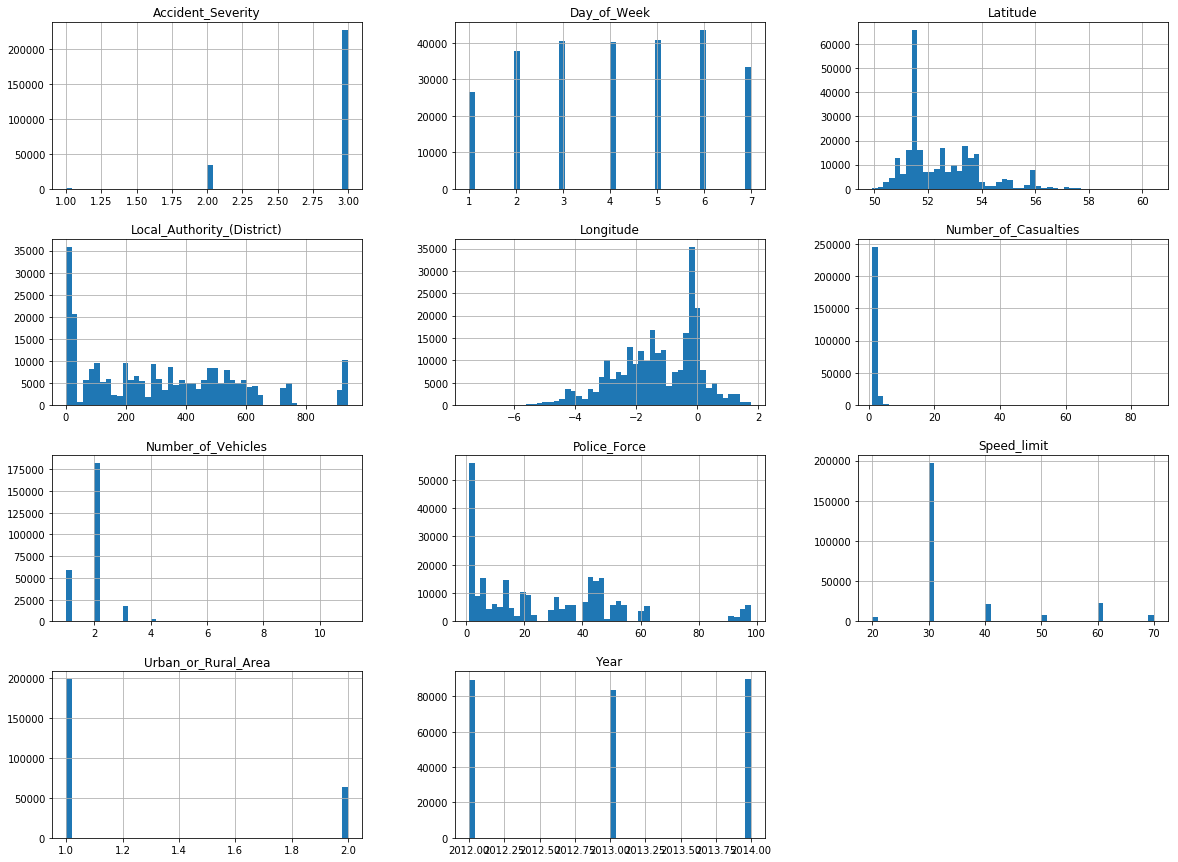

In [12]:
#Histograma de todos os atributos do dataset
df.hist(bins=50, figsize=(20,15))
plt.show()

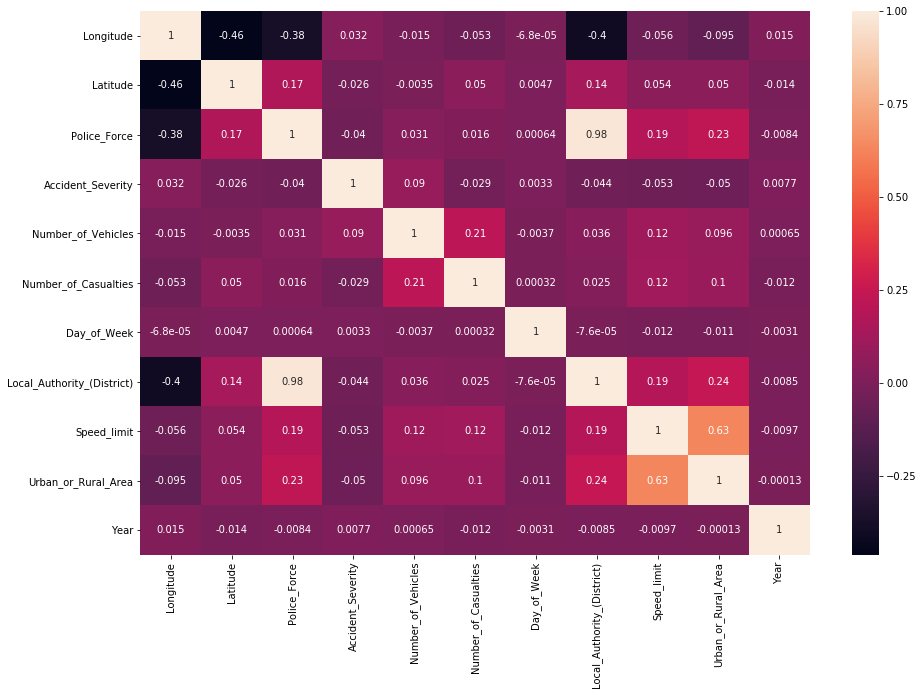

In [13]:
#Obtendo correlação entre as variáveis e apresentando num heatmap
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

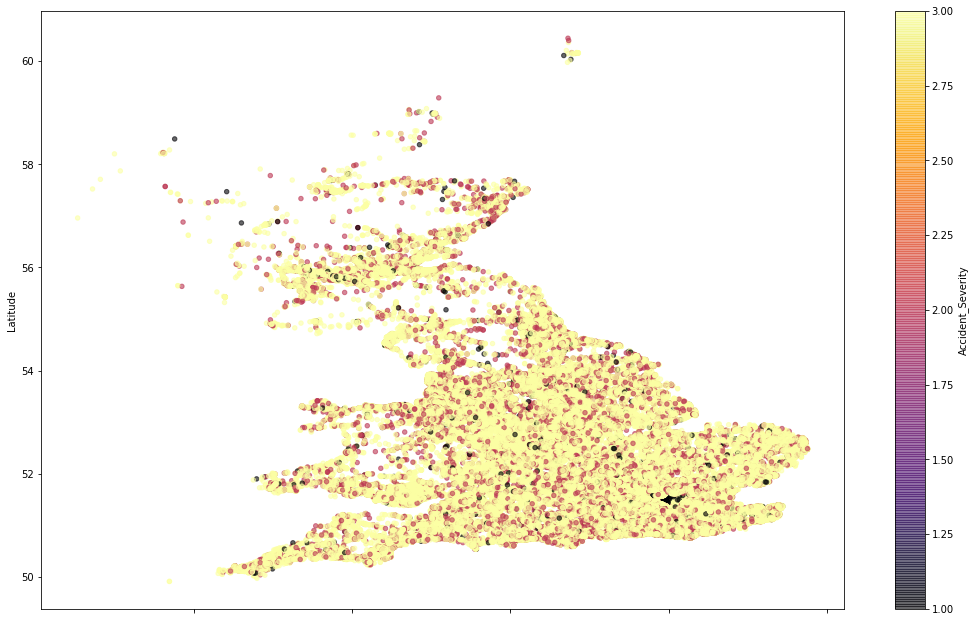

In [14]:
#Plotando num gráfico a localização dos acidentes distinguindo a severidade deles
fig = df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.6,
                   figsize=(18,11),c="Accident_Severity", cmap=plt.get_cmap("inferno"), 
                   colorbar=True,)

### Análise através do agrupamento de dados

A ideia dessa seção é encontrar acidentes com características parecidas.

In [ ]:
#Bibliotecas necessárias para o agrupamento
from sklearn.cluster import KMeans

Para o agrupamento, devemos considerar somente os atributos cujos valores são *float* (números reais).

In [ ]:
df_agrup = df.drop(columns=[
    'Date',
    'Time',
    'Local_Authority_(Highway)',
    'Road_Type',
    'Junction_Control',
    'Pedestrian_Crossing-Human_Control',
    'Pedestrian_Crossing-Physical_Facilities',
    'Light_Conditions',
    'Weather_Conditions',
    'Road_Surface_Conditions',
    'Did_Police_Officer_Attend_Scene_of_Accident'
])

In [ ]:
#Atributos do dataset usado no agrupamento
print("Atributos do dataset de agrupamento:")
for i in df_agrup.columns:
    print("\t" + i)

In [ ]:
#Aplicando o algoritmo KMeans, considerando 5 grupos
n_clusters = 5
X = np.array(df_agrup)
model = KMeans(n_clusters=n_clusters)
model.fit(X)

In [ ]:
#Apresentando como cada grupo ficou classificado
#Essa célula demora em torno de 10 minutos para executar

df_groups = [pd.DataFrame(columns=df_agrup.columns) for x in range(n_clusters)]

for g in range(len(model.labels_)):
    index = model.labels_[g]
    df_groups[index] = df_groups[index].append(df_agrup.iloc[[g]])

In [ ]:
df_groups[0]

In [ ]:
#contarFrequenciaDeAtributo
# for i in range(n_clusters):
#     print("Grupo %d:" % i)
#     df_groups[i].hist(bins=50, figsize=(10,5))

# plt.show()

for col in df_agrup.columns:
    df_groups[0][col].hist(bins=50, figsize=(15,5))
        
plt.show(True)

### Exploração via regras de associação

A ideia dessa seção é descobrir se certas características implicam outras.

In [ ]:
#Importando bibliotecas necessárias
from apyori import apriori

In [ ]:
#Dataset original
df.head(10)

In [ ]:
#Retirando atributos irrelevantes para a análise
df_ra = df.drop(columns=[
    'Longitude',
    'Latitude',
    'Police_Force',
    'Number_of_Vehicles',
    'Number_of_Casualties',
    'Date',
    'Time',
    'Local_Authority_(District)',
    'Local_Authority_(Highway)',
])

In [40]:
#Função para substituição de um padrão de valores por outro padrão
def mudaValoresCorrespondentes(data, atributo, dict_replace):
    data[atributo] = data[atributo].replace(dict_replace)

In [ ]:
#Substituindo atributos numéricos por atributos verbosos
#Facilita a posterior visualização
atribs = [
    'Accident_Severity',
    'Day_of_Week',
    'Urban_or_Rural_Area'
]
subst = [
    {1: "Baixo", 2: "Médio", 3: "Alto"},
    {1: "Domingo", 2: "Segunda", 3: "Terça", 4: "Quarta", 5: "Quinta", 6: "Sexta", 7: "Sábado"},
    {1: "Urbano", 2: "Rural"}
]

for i, j in zip(atribs, subst):
    mudaValoresCorrespondentes(df_ra, i, j)

In [ ]:
#Dataset a ser utilizado
df_ra.head(10)

In [ ]:
#Inserindo todos os atributos em um array para posterior uso no algoritmo
arr_ra = np.array(df_ra, dtype=str)
arr_ra

In [ ]:
#Aplicando o algoritmo Apriori
min_support = 0.1
min_confidence = 0.5
min_lift = 2
min_length = 2

association_rules = apriori(arr_ra,
                        min_support=min_support,
                        min_confidence=min_confidence,
                        min_lift=min_lift,
                        min_length=min_length)

association_results = list(association_rules)

In [ ]:
#Imprimindo todos os conjuntos com suas regras de associação e medidas de interesse
print("===== Todas as regras de associação =====\n")
print("=====================================")
for item in association_results:

    #Conjunto de atributos analisados
    pair = item[0] 
    items = [x for x in pair]
    print("Conjunto: ", end='')
    i = 0
    for it in items:
        if i == 0:
            print(it, end='')
        else:
            print(', ' + str(it), end='')
        i += 1

    #Suporte do conjunto analisado
    print("\nSuporte: " + str(item[1]))
    
    #Analisando cada uma das regras de associação criadas para um mesmo conjunto de atributos
    for ord_stat in item[2]:
        print("\n\t========")
        
        print("\tRegra: ", end='')
        i = 0
        
        #Imprimindo todos os atributos base
        for base in ord_stat[0]:
            if i == 0:
                print(base, end='')
            else:
                print(', ' + str(base), end='')
            i += 1
        
        #Imprimindo o atributo adicional (sempre será apenas 1; o procedimento abaixo é para deixar
        #a impressão mais legível)
        for add in ord_stat[1]:
            print(" -> " + add)
            
        #Confiança e lift para a regra analisada
        print("\tConfiança: " + str(ord_stat[2]))
        print("\tLift: " + str(ord_stat[3]))
    
    print("\n=====================================")

In [ ]:
#Função auxiliar para ordenação dos atributos de acordo com a medida especificada
def ordenarPorAtributoComAnalise(lista, atrib, maxitems=0):
    #Ordenando pelo atributo escolhido
    lista.sort(key=lambda x: x[atrib], reverse=True)
    
    #Tratando caso de printar máximo de itens
    maxiterations = maxitems
    if maxitems == 0 or maxitems > len(lista):
        maxiterations = len(lista)
    
    #Passando por todos os itens e printando seus atributos até o número máximo escolhido
    for ord_stat, i in zip(lista, range(maxiterations)):
        print("Regra: ", end='')
        i = 0

        #Imprimindo todos os atributos base
        for base in ord_stat['base']:
            if i == 0:
                print(base, end='')
            else:
                print(', ' + str(base), end='')
            i += 1

        #Imprimindo o atributo adicional (sempre será apenas 1; o procedimento abaixo é para deixar
        #a impressão mais legível)
        for add in ord_stat['add']:
            print(" -> " + add)

        print("\tSuporte: " + str(ord_stat['sup']))
        print("\tConfiança: " + str(ord_stat['conf']))
        print("\tLift: " + str(ord_stat['lift']), end='\n\n')

In [ ]:
#Obtendo as relações com maiores valores de determinado atributo (suporte, confiança ou lift)
upper = []

#Inserindo todas as OrderedStatistic na lista em forma de dicionário
#O intuito é poder inserir a informação do suporte de cada OrderedStatistic
for item in association_results:
    for ord_stat in item[2]:
        
        #Construção do dicionário
        sup = item[1]
        base = [x for x in ord_stat[0]]
        add = [x for x in ord_stat[1]]
        conf = ord_stat[2]
        lift = ord_stat[3]
        
        ord_stat_dic = {'sup': sup, 'base': base, 'add': add, 'conf': conf, 'lift': lift}
        
        #Inserção na lista principal
        upper.append(ord_stat_dic)

In [ ]:
#Ordenando por lift
ordenarPorAtributoComAnalise(upper, 'lift', len(association_results))

Daqui, podemos tirar conclusões sobre como se associam as características.

### Uso de modelos preditivos

A ideia nessa seção é predizer a severidade do acidente de acordo com o dado analisado.

In [73]:
#Bibliotecas necessárias
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [29]:
#Dataset bruto original
df.head(10)

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.169101,51.493429,1,3,2,1,19/01/2012,5,20:35,12,E09000020,Single carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
1,-0.200838,51.517931,1,3,2,1,04/01/2012,4,17:00,1,E09000033,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
2,-0.188636,51.487618,1,3,2,1,10/01/2012,3,10:07,12,E09000020,One way street,30,Giveway or uncontrolled,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
3,-0.200259,51.514325,1,3,1,1,18/01/2012,4,12:20,12,E09000020,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
4,-0.183773,51.497614,1,3,1,1,17/01/2012,3,20:24,12,E09000020,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
5,-0.185496,51.483253,1,3,2,1,19/01/2012,5,07:30,12,E09000020,Single carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,1,Yes,2012
6,-0.160418,51.501567,1,3,1,1,12/01/2012,5,14:00,1,E09000033,Single carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
7,-0.213862,51.523975,1,3,2,1,07/01/2012,7,11:29,12,E09000020,Roundabout,30,Giveway or uncontrolled,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
8,-0.161567,51.498077,1,3,2,1,07/01/2012,7,13:55,12,E09000020,One way street,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,No,2012
9,-0.198587,51.505576,1,3,2,1,04/01/2012,4,19:40,12,E09000020,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,1,Yes,2012


In [85]:
#Configurando um dataframe com os dados convertidos para valores codificados int
#facilitanto o treino
df_class = df.copy()

le = LabelEncoder()

for i in df_class.columns:
    if i != 'Accident_Severity':
        df_class[i] = le.fit_transform(df_class[i])

In [86]:
#Apresentando o dataset
df_class.head(10)

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,172014,59084,0,3,1,0,648,4,1234,11,111,3,1,1,2,3,2,1,0,0,1,0
1,167468,66220,0,3,1,0,108,3,1019,0,124,3,1,2,2,2,2,1,0,0,1,0
2,169323,57493,0,3,1,0,324,2,606,11,111,1,1,2,2,5,4,1,0,0,1,0
3,167528,64992,0,3,0,0,612,3,739,11,111,3,1,2,2,2,4,1,0,0,1,0
4,169943,60121,0,3,0,0,576,2,1223,11,111,3,1,2,2,2,2,1,0,0,1,0
5,169764,56393,0,3,1,0,648,4,449,11,111,3,1,1,2,3,2,5,4,0,1,0
6,173418,61144,0,3,0,0,396,4,839,0,124,3,1,1,2,3,4,1,0,0,1,0
7,165802,68135,0,3,1,0,216,6,688,11,111,2,1,2,2,4,4,1,0,0,1,0
8,173274,60260,0,3,1,0,216,6,834,11,111,1,1,2,2,2,4,1,0,0,0,0
9,167816,62111,0,3,1,0,108,3,1179,11,111,3,1,2,2,2,2,5,4,0,1,0


In [87]:
#Convertendo em array, separando a classe dos atributos
Y = np.array(df_class['Accident_Severity'])
X = np.array(df_class.drop(columns=['Accident_Severity']))

In [88]:
#Criando conjunto de teste e treino, com 70% dos dados para treino
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)

In [89]:
def treinarKNN(train_x, train_y, test_x, test_y, n_neighbors=1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    return accuracy_score(pred_y, test_y), confusion_matrix(test_y, pred_y)

In [90]:
def treinarNaiveBayes(train_x, train_y, test_x, test_y):
    gnb = GaussianNB()
    gnb.fit(train_x, train_y)
    pred_y = gnb.predict(test_x)
    return accuracy_score(pred_y, test_y), confusion_matrix(test_y, pred_y)

In [91]:
#Treinando o modelo KNN de classificação, para k variando de 1 a 10
print("==== Acurácia para cada número de vizinhos ====\n")
for k in range(1, 11):
    acc, cm = treinarKNN(train_x, train_y, test_x, test_y, k)
    print("k = %d: %.2f%%" % (k, 100*acc))
    print("Matriz de confusão:")
    print(cm, end='\n\n')

==== Acurácia para cada número de vizinhos ====

k = 1: 77.20%
Matriz de confusão:
[[    8    77   411]
 [   75  1383  8462]
 [  423  8164 58258]]

k = 2: 69.26%
Matriz de confusão:
[[   12   133   351]
 [  142  2541  7237]
 [  815 15072 50958]]

k = 3: 82.86%
Matriz de confusão:
[[    2    20   474]
 [   58   571  9291]
 [  319  3077 63449]]

k = 4: 80.75%
Matriz de confusão:
[[    0    44   452]
 [    8  1032  8880]
 [   43  5446 61356]]

k = 5: 84.97%
Matriz de confusão:
[[    0    15   481]
 [    7   298  9615]
 [   27  1464 65354]]

k = 6: 84.16%
Matriz de confusão:
[[    1    16   479]
 [    2   453  9465]
 [    9  2268 64568]]

k = 7: 85.75%
Matriz de confusão:
[[    0     6   490]
 [    0   151  9769]
 [    4   742 66099]]

k = 8: 85.38%
Matriz de confusão:
[[    0     7   489]
 [    1   223  9696]
 [    4  1097 65744]]

k = 9: 86.12%
Matriz de confusão:
[[    0     7   489]
 [    1    86  9833]
 [    4   386 66455]]

k = 10: 85.98%
Matriz de confusão:
[[    0     7   489]
 [  

In [92]:
#Treinando o modelo Naive Bayes de classificação
print("==== Acurácia para o algoritmo Naive Bayes ====")
acc, cm = treinarNaiveBayes(train_x, train_y, test_x, test_y)
print("k = %d: %.2f%%" % (k, 100*acc))
print("Matriz de confusão:")
print(cm, end='\n\n')

==== Acurácia para o algoritmo Naive Bayes ====
k = 10: 86.52%
Matriz de confusão:
[[    1     0   495]
 [    1     0  9919]
 [    0     0 66845]]



Vemos que o algoritmo Naive Bayes possuiu melhor desempenho na classificação, e, além disso, é possível concluir que é claramente possível prever a severidade de um acidente de acordo com a situação caso haja mesmo um acidente, ainda mais com 86% de acurácia.